<a href="https://colab.research.google.com/github/shitthings/LabShit/blob/main/DeepLearningLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROGRAM-2 Installing Keras, Tensorflow, and Pytorch libraries and making use of them.**


In [ ]:
!pip install tensorflow
!pip install torch torchvision torchaudio

In [ ]:
	from tensorflow.keras import layers, models
	from tensorflow.keras.datasets import mnist

	# Load dataset
	(x_train, y_train), (x_test, y_test) = mnist.load_data()
	x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([
    		layers.Flatten(input_shape=(28, 28)),
    		layers.Dense(128, activation='relu'),
         		layers.Dense(10, activation='softmax')
	])

	# Compile the model
model.compile(optimizer='adam',
              		loss='sparse_categorical_crossentropy',
              		metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model
model.fit(x_train, y_train, epochs=5)

	# Evaluate the model
Test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8773 - loss: 0.4358
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9655 - loss: 0.1170
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9779 - loss: 0.0745
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9843 - loss: 0.0520
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9880 - loss: 0.0420
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9733 - loss: 0.0859
Test accuracy: 0.9775999784469604


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 141499653.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 24319553.07it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 43590481.27it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 6717393.78it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class SimpleNN(nn.Module):
  def __init__(self):
    super(SimpleNN, self).__init__()
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 128)
    self.fc2 = nn.Linear(128, 10)
  def forward(self, x):
    x = self.flatten(x)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x
# Initialize model
model = SimpleNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
for epoch in range(5):
	for batch in train_loader:
		inputs, labels = batch
		outputs = model(inputs)
		loss = criterion(outputs, labels)
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
	print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.3089102506637573
Epoch 2, Loss: 0.13561439514160156
Epoch 3, Loss: 0.051036443561315536
Epoch 4, Loss: 0.08533293753862381
Epoch 5, Loss: 0.3667554259300232


## **3.  Applying the Convolution Neural Network on computer vision problems.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add a single channel (since images are grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    layers.MaxPooling2D((2, 2)),  # Pooling layer with 2x2 pool size
    layers.Flatten(),  # Flatten the output from the convolutional layer
    layers.Dense(64, activation='relu'),  # Fully connected layer with 64 neurons
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              			loss='sparse_categorical_crossentropy',
             		 	metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 32ms/step - accuracy: 0.8860 - loss: 0.4096
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.9795 - loss: 0.0708
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9866 - loss: 0.0461
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9902 - loss: 0.0323
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 30ms/step - accuracy: 0.9927 - loss: 0.0243


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9819 - loss: 0.0582
Test accuracy: 0.984000027179718


## **4. Image classification on MNIST dataset (CNN model with a fully connected layer).**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to add a single channel (since images are grayscale)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
model = models.Sequential([
# First convolutional layer layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
layers.MaxPooling2D((2, 2)), # Second convolutional layer
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)), # Third convolutional layer
 layers.Conv2D(64, (3, 3), activation='relu'),
# Flatten the output from convolutional layers
layers.Flatten(),
 # Fully connected layer (Dense layer)
layers.Dense(64, activation='relu'),
 # Output layer with softmax for classification (10 classes for digits 0-9) layers.Dense(10, activation='softmax')
 ])


In [ ]:
model.compile(optimizer='adam',
              			loss='sparse_categorical_crossentropy',
             		 	metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.1226 - loss: 4.2448
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0982 - loss: 4.1589
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.0992 - loss: 4.1589
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.0987 - loss: 4.1589
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.0981 - loss: 4.1589


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0924 - loss: 4.1589
Test accuracy: 0.09799999743700027


In [ ]:
predictions = model.predict(x_test)

# Get the predicted class for the first test image
predicted_label = tf.argmax(predictions[0])
print(f'Predicted label: {predicted_label.numpy()}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Predicted label: 0


## **5. Applying the Deep Learning Models in the field of Natural Language Processing.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


In [ ]:
# Load the IMDb dataset (only top 10,000 most frequent words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
# Set the maximum length of each review to 500 words (truncating or padding shorter/longer reviews)
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Define the model
model = models.Sequential([
    # Embedding layer: Converts words into dense vectors
    layers.Embedding(input_dim=num_words, output_dim=64, input_length=max_len),

    # LSTM layer: Captures sequential patterns
    layers.LSTM(64),

    # Dense layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 131s 404ms/step - accuracy: 0.6572 - loss: 0.5990 - val_accuracy: 0.8406 - val_loss: 0.3742
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 429ms/step - accuracy: 0.8680 - loss: 0.3273 - val_accuracy: 0.8700 - val_loss: 0.3061
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 464ms/step - accuracy: 0.9321 - loss: 0.1951 - val_accuracy: 0.8456 - val_loss: 0.3699
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 430ms/step - accuracy: 0.9415 - loss: 0.1607 - val_accuracy: 0.8708 - val_loss: 0.3362
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 154s 469ms/step - accuracy: 0.9531 - loss: 0.1338 - val_accuracy: 0.7774 - val_loss: 0.4715


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.7825 - loss: 0.4723
Test accuracy: 0.7889999747276306


In [ ]:
# Example review (preprocessed as integer sequences)
new_review = [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 4581, 66, 394, 2, 530, 973]
new_review = sequence.pad_sequences([new_review], maxlen=max_len)

# Predict sentiment (1: Positive, 0: Negative)
prediction = model.predict(new_review)
print(f'Predicted sentiment: {"Positive" if prediction >= 0.5 else "Negative"}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
Predicted sentiment: Negative


## **6. Train a sentiment analysis model on IMDB dataset, use RNN layers with LSTM/GRU notes.**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence


In [ ]:
# Load the IMDb dataset with a limit of 10,000 words
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
# Set the maximum length for each review
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


In [ ]:
model = models.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=64, input_length=max_len),
    layers.LSTM(64),  # LSTM layer with 64 units
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Display the model architecture
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 394ms/step - accuracy: 0.8430 - loss: 0.3762 - val_accuracy: 0.8194 - val_loss: 0.4084
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 390ms/step - accuracy: 0.8727 - loss: 0.3178 - val_accuracy: 0.8258 - val_loss: 0.3993


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.8275 - loss: 0.3964
Test accuracy: 0.8252800107002258


In [ ]:
# Example review (preprocessed as integer sequences)
new_review = [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 4581, 66, 394, 2, 530, 973]
new_review = sequence.pad_sequences([new_review], maxlen=max_len)
# Predict sentiment (1: Positive, 0: Negative)
prediction = model.predict(new_review)
print(f'Predicted sentiment: {"Positive" if prediction >= 0.5 else "Negative"}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Predicted sentiment: Negative


## **7. Applying the Auto encoder algorithms for encoding the real-world data.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import load_digits


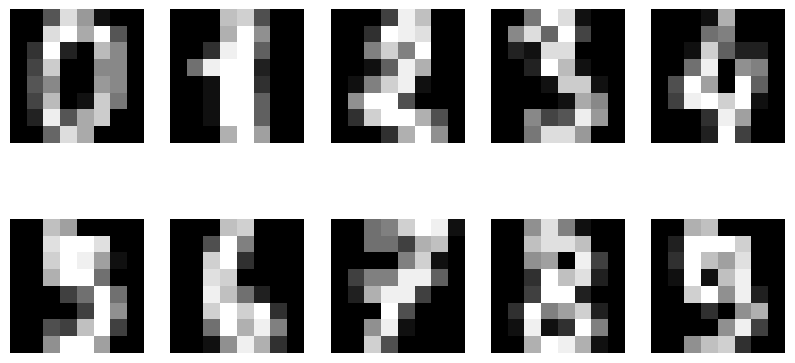

In [ ]:
digits = load_digits()
data = digits.data  # Shape: (1797, 64)

# Normalize the data to the range [0, 1]
data = data / 16.0

# Visualize some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
# Define the Autoencoder model
input_dim = data.shape[1]  # Number of features (64 for 8x8 images)
# Encoder
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(32, activation='relu')(input_layer)  # Compress to 32 dimensions
# Decoder
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)  # Reconstruct original dimensions
# Combine into an Autoencoder model
autoencoder = models.Model(input_layer, decoded)
# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
# Display the model architecture
autoencoder.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           2,112 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,192 (16.38 KB)

 Trainable params: 4,192 (16.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.7032 - val_loss: 0.6871
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6832 - val_loss: 0.6680
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6641 - val_loss: 0.6484
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6440 - val_loss: 0.6268
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6218 - val_loss: 0.6022
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5962 - val_loss: 0.5747
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5683 - val_loss: 0.5450
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5383 - val_loss: 0.5147
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5080 - val_loss: 0.4864
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4814 - val_loss: 0.4627
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4593 - val_loss: 0.4446
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4436 - val_loss: 0.4313
E

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


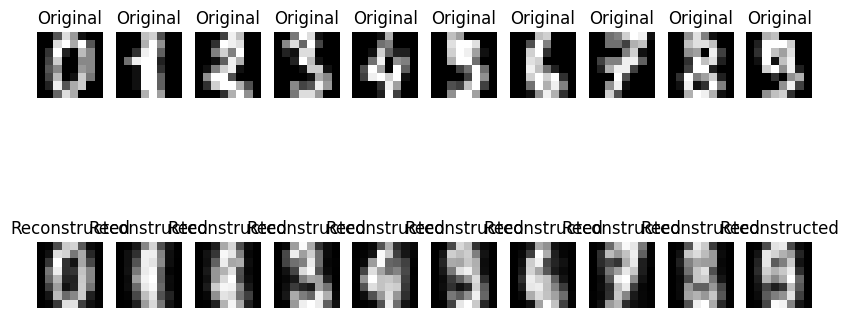

In [ ]:
# Encode and decode some digits
encoded_data = autoencoder.predict(data)

# Plot original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(10, 5))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(data[i].reshape(8, 8), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(encoded_data[i].reshape(8, 8), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()


In [ ]:
# Create a model to extract the encoded features
encoder = models.Model(input_layer, encoded)
# Get encoded features
encoded_features = encoder.predict(data)
# Display the shape of the encoded features
print(f"Encoded features shape: {encoded_features.shape}")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Encoded features shape: (1797, 32)


## **8. Applying Generative Adversial Networks for image generation and unsupervised tasks.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist


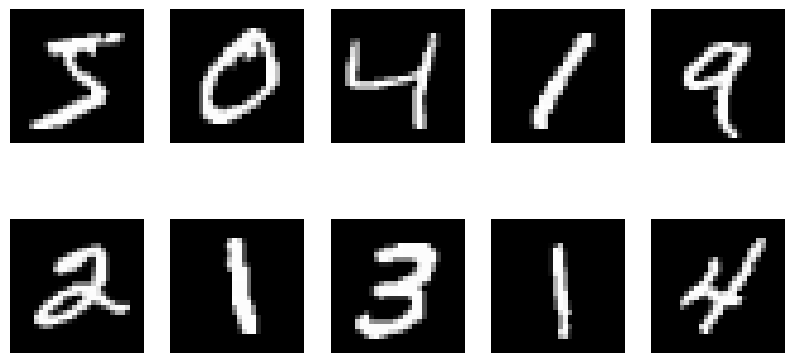

In [ ]:
# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = (x_train.astype(np.float32) - 127.5) / 127.5  # Scale to [-1, 1]

# Reshape the data to (num_samples, height, width, channels)
x_train = np.expand_dims(x_train, axis=-1)

# Display some samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
def build_generator():
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(100,)),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(1024, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(28 * 28 * 1, activation='tanh'),  # Output layer
        layers.Reshape((28, 28, 1))
    ])
    return model

# Discriminator model
def build_discriminator():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification (real or fake)
    ])
    return model

generator = build_generator()
discriminator = build_discriminator()

# Compile the discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Combine generator and discriminator into GAN model
discriminator.trainable = False  # Freeze the discriminator during generator training
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = models.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# Training parameters
epochs = 11 #change this to 10000
batch_size = 128
half_batch = batch_size // 2

# Lists to keep track of losses
d_losses = []
g_losses = []


for epoch in range(epochs):
    # Train Discriminator
    # Select a random half batch of real images
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_images = x_train[idx]

    # Generate a half batch of fake images
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)

    # Labels for real and fake images
    real_labels = np.ones((half_batch, 1))
    fake_labels = np.zeros((half_batch, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_labels = np.ones((batch_size, 1))  # Try to fool the discriminator

    # Train the generator
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save losses
    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Print the progress
    if epoch % 5 == 0: #change 5 to 1000
        print(f"Epoch: {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0, D Loss: 0.9882816076278687, G Loss: [array(0.8604803, dtype=float32), array(0.8604803, dtype=float32), array(0.5, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch: 5, D Loss: 0.9054064750671387, G Loss: [array(0.9005037, dtype=float32), array(0.9005037, dtype=float32), array(0.27083334, dtype=float32)]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch: 10, D Loss: 0.955592155456543, G Loss: [array(0.95775706, dtype=float32), array(0.95775706, dtype=float32), array(0.15625, dtype=float32)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


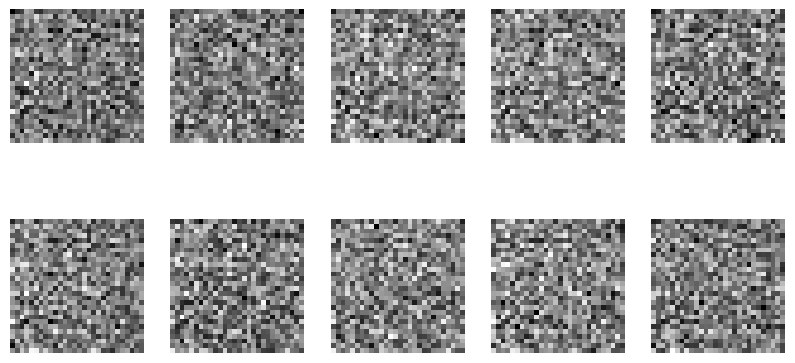

In [ ]:
# Generate images
def generate_images(generator, n_images=10):
    noise = np.random.normal(0, 1, (n_images, 100))
    generated_images = generator.predict(noise)

    plt.figure(figsize=(10, 5))
    for i in range(n_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

generate_images(generator, 10)

## **END OF LAB**